Connected to Python 3.9.8

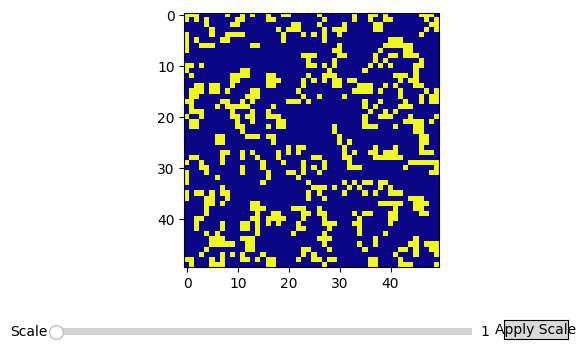

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation

def conways_rule(state, neighbors):
    alive_neighbors = sum(neighbors)
    if state == 1 and alive_neighbors < 2:
        return 0
    elif state == 1 and alive_neighbors > 3:
        return 0
    elif state == 0 and alive_neighbors == 3:
        return 1
    else:
        return state

class CellularAutomaton:
    def __init__(self, rows, cols, rule_func, initial_state=None, cmap='viridis'):
        self.rows = rows
        self.cols = cols
        self.grid = np.random.choice([0, 1], size=(rows, cols)) if initial_state is None else np.array(initial_state)
        self.rule_func = rule_func
        self.cmap = cmap

    def update(self):
        new_grid = np.copy(self.grid)
        for i in range(self.rows):
            for j in range(self.cols):
                state = self.grid[i, j]
                neighbors = self.get_neighbors(i, j)
                new_grid[i, j] = self.rule_func(state, neighbors)
        self.grid = new_grid

    def get_neighbors(self, row, col):
        neighbors = self.grid[max(row-1, 0):min(row+2, self.rows),
                              max(col-1, 0):min(col+2, self.cols)].flatten()
        return np.delete(neighbors, len(neighbors)//2)

    def animate(self, steps, interval=100):
        fig, ax = plt.subplots()
        plt.subplots_adjust(left=0.1, bottom=0.35)
        img = ax.imshow(self.grid, interpolation='nearest', cmap=self.cmap)

        ax_scale = plt.axes([0.1, 0.2, 0.65, 0.03], facecolor='lightgoldenrodyellow')
        scale_slider = Slider(ax_scale, 'Scale', 1, 10, valinit=1, valstep=1)

        ax_button = plt.axes([0.8, 0.2, 0.1, 0.04])
        scale_button = Button(ax_button, 'Apply Scale')

        def update_frame(*args):
            self.update()
            img.set_data(self.grid)
            return img,

        def apply_scale(event):
            scale_factor = int(scale_slider.val)
            self.reset(scale_factor * 10, scale_factor * 10)  # Adjust base size as needed
            img.set_data(self.grid)
            fig.canvas.draw_idle()

        scale_button.on_clicked(apply_scale)
        ani = FuncAnimation(fig, update_frame, frames=steps, interval=interval, blit=True)
        plt.show()

    def reset(self, new_rows, new_cols):
        self.rows = new_rows
        self.cols = new_cols
        self.grid = np.random.choice([0, 1], size=(new_rows, new_cols))

# Initialize and run the cellular automaton
automaton = CellularAutomaton(50, 50, conways_rule, cmap='plasma')
automaton.animate(100)